In [1]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from geopy.distance import geodesic
import geopy


In [3]:
# Load data from CSV
locations_df = pd.read_json('../Data/locations.json')
distances_df = pd.read_json('../Data/distances.json')

In [13]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes with attributes
for loc in locations_df.iterrows():
    coord = (loc['Coordinates']['x'], loc['Coordinates']['y'])
    G.add_node(loc['LocationID'], name=loc['Name'], type=loc['Type'], address=loc['Address'], coordinates=coord)

# Add edges with attributes
for index, row in distances_df.iterrows():
    G.add_edge(row['From'], row['To'], distance_km=row['DistanceKm'])

TypeError: tuple indices must be integers or slices, not str

In [5]:
# Function to calculate distances (replace this with your actual distance calculation method)
def calculate_distance(coord1, coord2):
    return geopy.distance.geodesic(coord1, coord2).km

# Function to add a new location
def add_new_location(G, new_id, new_name, new_type, new_address, new_coordinates):
    G.add_node(new_id, name=new_name, type=new_type, address=new_address, coordinates=new_coordinates)
    
    # Calculate distance from the new location to all existing nodes and store distances
    distances = []
    for node_id, node_data in G.nodes(data=True):
        if node_id != new_id:  # Avoid self-comparison
            dist = calculate_distance(new_coordinates, node_data['coordinates'])
            distances.append((node_id, dist))
    
    # Sort distances and select the nearest 10
    nearest_ten = sorted(distances, key=lambda x: x[1])[:10]
    
    # Add edges to and from the new node for these nearest locations
    for node_id, dist in nearest_ten:
        G.add_edge(new_id, node_id, distance_km=dist)
        G.add_edge(node_id, new_id, distance_km=dist)

# Function to visualize the optimized route
def visualize_optimized_route(G, start, end):
    # Check if both nodes are in the graph
    if start not in G or end not in G:
        print("One or both of the specified nodes do not exist in the graph")
        return
    
    try:
        # Find the shortest path based on distance
        path = nx.shortest_path(G, source=start, target=end, weight='distance_km')
        path_length = nx.shortest_path_length(G, source=start, target=end, weight='distance_km')
        print("Optimal route:", " -> ".join(path))
        print("Total distance (km):", path_length)
        
        # Highlight the path on the graph
        path_edges = list(zip(path[:-1], path[1:]))
        pos = nx.spring_layout(G)  # positions for all nodes
        
        # Draw the entire graph
        nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=10, edge_color='gray', width=1, font_size=8)
        labels = nx.get_edge_attributes(G, 'distance_km')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='red')
        
        # Highlight the path edges
        nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='blue', node_size=10)
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)
        
        plt.show()
    except nx.NetworkXNoPath:
        print("No path between these locations")

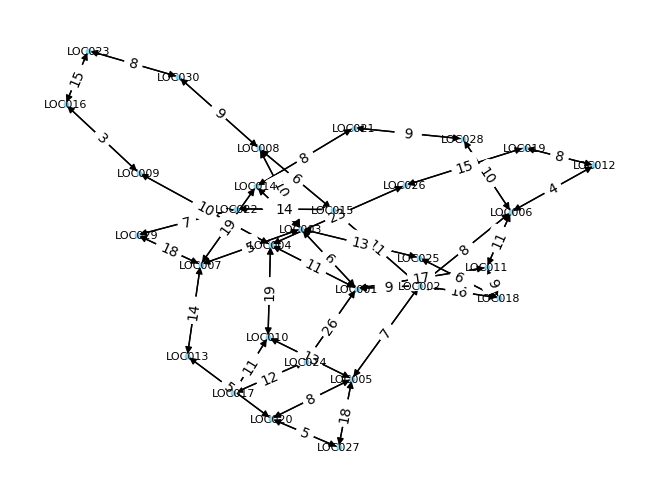

In [6]:
# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=10, edge_color='k', linewidths=1, font_size=8)
labels = nx.get_edge_attributes(G, 'distance_km')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()


Optimal route: LOC001 -> LOC024 -> LOC017
Total distance (km): 37


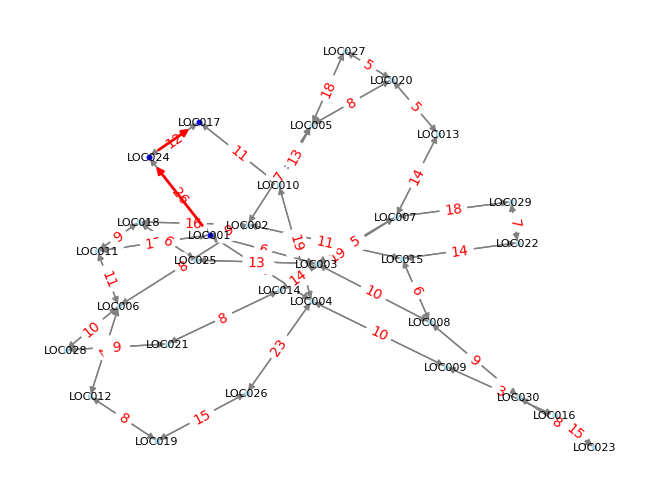

In [7]:
# Example start and end points
start_location = 'LOC001'
end_location = 'LOC017'

visualize_optimized_route(G, start_location, end_location)



In [10]:
new_location_id = 'LOCCCCCCCx'
new_location_name = 'test'
new_location_type = 'Cua_khau'
new_location_address = 'AddressTest'
new_location_coordinates = (10.2570, 106.045) 

add_new_location(G, new_location_id, new_location_name, new_location_type, new_location_address, new_location_coordinates)

visualize_optimized_route(G, start_location, 'LOCx')


ValueError: could not convert string to float: 'x'